## Model Training (Do not run this)

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")

# Train the model
train_results = model.train(
    data="/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_692/new_training_data/data.yaml",  # path to dataset YAML
    epochs=30,  # number of training epochs
    imgsz=640,  # training image size
    device="cpu",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

# Evaluate model performance on the validation set
metrics = model.val()

# Resources from https://github.com/ultralytics/ultralytics

## -----------The Actual thing below-------------

### Import Packages

In [2]:
import cv2
from ultralytics import YOLO
import imageio
import numpy as np

save file

In [3]:
# to calculate angles, I need 3 points with Xs and Ys, therefore total of 6 values.
def angle_cal(ax,ay,bx,by,cx,cy):
    #convert to integers for better calculation
    ax = int(ax)
    ay = int(ay)
    bx = int(bx)
    by = int(by)
    cx = int(cx)
    cy = int(cy)
    # get the radians through 3 points
    radians = np.arctan2(cy-by,cx-bx)-np.arctan2(ay-by,ax-bx)
    angle = int(np.abs(radians*180/np.pi))

    if angle > 180.0:
        angle = 360-angle

    return angle
# formula thoughts refered to: https://www.youtube.com/watch?v=06TE_U21FK4


### Set Variables

In [4]:
frame_id = 0
detections = set()
tracker = None
trajectory = []
pose_point = []


score = 0
miss = 0
check = 0
pending = 0
trigger = 0
countdown = 100

# to get a series of points i can graph
actual_traj = []

In [5]:
print(actual_traj)

[]


<Axes: xlabel='x', ylabel='y'>

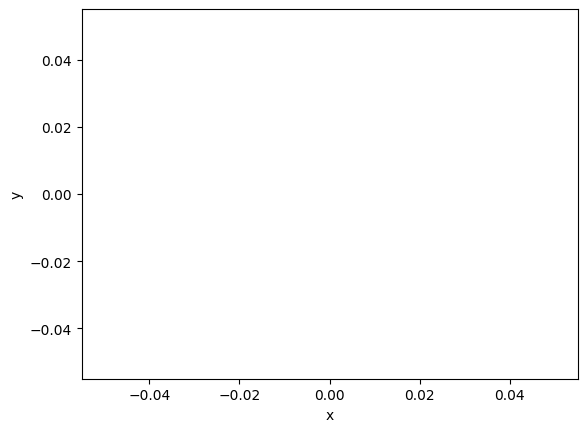

In [6]:
import pandas as pd
df = pd.DataFrame(actual_traj,columns=['x','y'])
df.head()
df.plot.scatter(x= 'x', y= 'y' )



### Run the model

In [8]:
# start video
vid = cv2.VideoCapture('/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_692/new_training_data/videos/IMG_4211.MOV')
#vid= cv2.VideoCapture(0)
# run the model (model as object detection,model2 as pose detection)
model = YOLO('/Users/johnxie301/Desktop/Regis_Data_Science/MSDS_692/runs/detect/train8/weights/best.pt')
model_2 = YOLO('/Users/johnxie301/Downloads/yolov8n-pose.pt')

# unlock below if you want to save this as a mp4 format video file, also the out.write() at the near very bottom.

frame_width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = vid.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object to save the output video
output_file = 'final_ver1.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 format
out = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height))



# run the loop to show frames
while True:
    #Read the video as frames
    ret, frame = vid.read()
    if ret: 
        # run the model of object detection on each frame
        results = model.predict(frame)#,conf = 0.6)
        # run the model of pose detection on each frame
        results2 = model_2.predict(frame)
        # plot the class boxes from object detection
        annotated_frame = results[0].plot()
        
        #draw angles on the points
        for result2 in results2:
            # point indicates all the point locations to form a pose in tensor format
            point = result2.keypoints.xy[0]
            # this if statement is for a freeze bug occurs when no person detected in the frame. I solve it in the cheap way.(A running code is a good code, right?) 
            if len(point) == 17:
                #this part is meant to input the point locations therefore I can use openCV's circle to draw it on the other model's frames.
                for a in range(0,16):
                    pose_point.append([int(point[a][0]),int(point[a][1])])
                #point loactions necessary for angle calculation
                right_shoulder_x ,right_shoulder_y = point[6]
                right_elbow_x ,right_elbow_y = point[8]
                right_wrist_x ,right_wrist_y = point[10]
                left_shoulder_x ,left_shoulder_y = point[5]
                left_elbow_x ,left_elbow_y = point[7]
                left_wrist_x ,left_wrist_y = point[9]
                right_hip_x ,right_hip_y = point[12]
                right_knee_x ,right_knee_y = point[14]
                right_ankle_x ,right_ankle_y = point[16]
                left_hip_x ,left_hip_y = point[11]
                left_knee_x ,left_knee_y = point[13]
                left_ankle_x ,left_ankle_y = point[15]

                if all(num != 0 and not None for num in [int(right_shoulder_x),int(right_shoulder_y),int(left_shoulder_x),int(left_shoulder_y)]):
                    cv2.line(annotated_frame,(int(right_shoulder_x),int(right_shoulder_y)),(int(left_shoulder_x),int(left_shoulder_y)) , (0, 255, 255), 5, -1)
                else:
                    pass
                if all(num != 0 and not None for num in [int(right_shoulder_x),int(right_shoulder_y),int(right_elbow_x),int(right_elbow_y)]):
                    cv2.line(annotated_frame,(int(right_shoulder_x),int(right_shoulder_y)),(int(right_elbow_x),int(right_elbow_y)) , (0, 255, 255), 5, -1)
                else:
                    pass                
                if all(num != 0 and not None for num in [int(right_elbow_x),int(right_elbow_y),int(right_wrist_x),int(right_wrist_y)]):               
                    cv2.line(annotated_frame,(int(right_elbow_x),int(right_elbow_y)),(int(right_wrist_x),int(right_wrist_y)) , (0, 255, 255), 5, -1)
                else:
                    pass              
                if all(num != 0 and not None for num in [int(left_shoulder_x),int(left_shoulder_y),int(left_elbow_x),int(left_elbow_y)]):
                    cv2.line(annotated_frame,(int(left_shoulder_x),int(left_shoulder_y)),(int(left_elbow_x),int(left_elbow_y)) , (0, 255, 255), 5, -1)
                else:
                    pass              
                if all(num != 0 and not None for num in [int(left_elbow_x),int(left_elbow_y),int(left_wrist_x),int(left_wrist_y)]):
                    cv2.line(annotated_frame,(int(left_elbow_x),int(left_elbow_y)),(int(left_wrist_x),int(left_wrist_y)) , (0, 255, 255), 5, -1)
                else:
                    pass               
                if all(num != 0 and not None for num in [int(right_hip_x),int(right_hip_y),int(left_hip_x),int(left_hip_y)]):
                    cv2.line(annotated_frame,(int(right_hip_x),int(right_hip_y)),(int(left_hip_x),int(left_hip_y)) , (0, 255, 255), 5, -1)
                else:
                    pass                
                if all(num != 0 and not None for num in [int(right_hip_x),int(right_hip_y),int(right_knee_x),int(right_knee_y)]):
                    cv2.line(annotated_frame,(int(right_hip_x),int(right_hip_y)),(int(right_knee_x),int(right_knee_y)) , (0, 255, 255), 5, -1)
                else:
                    pass                
                if all(num != 0 and not None for num in [int(right_knee_x),int(right_knee_y),int(right_ankle_x),int(right_ankle_y)]):
                    cv2.line(annotated_frame,(int(right_knee_x),int(right_knee_y)),(int(right_ankle_x),int(right_ankle_y)) , (0, 255, 255), 5, -1)
                else:
                    pass                
                if all(num != 0 and not None for num in [int(left_hip_x),int(left_hip_y),int(left_knee_x),int(left_knee_y)]):
                    cv2.line(annotated_frame,(int(left_hip_x),int(left_hip_y)),(int(left_knee_x),int(left_knee_y)) , (0, 255, 255), 5, -1)
                else:
                    pass                
                if all(num != 0 and not None for num in [int(left_knee_x),int(left_knee_y),int(left_ankle_x),int(left_ankle_y)]):
                    cv2.line(annotated_frame,(int(left_knee_x),int(left_knee_y)),(int(left_ankle_x),int(left_ankle_y)) , (0, 255, 255), 5, -1)
                else:
                    pass                
                if all(num != 0 and not None for num in [int(right_hip_x),int(right_hip_y),int(right_shoulder_x),int(right_shoulder_y)]):
                    cv2.line(annotated_frame,(int(right_hip_x),int(right_hip_y)),(int(right_shoulder_x),int(right_shoulder_y)) , (0, 255, 255), 5, -1)
                else:
                    pass
                if all(num != 0 and not None for num in [int(left_hip_x),int(left_hip_y),int(left_shoulder_x),int(left_shoulder_y)]):
                    cv2.line(annotated_frame,(int(left_hip_x),int(left_hip_y)),(int(left_shoulder_x),int(left_shoulder_y)) , (0, 255, 255), 5, -1)
                else:
                    pass
            #print('x_s:',right_shoulder_x,'y_s:',right_shoulder_y)

        # angle calculation using predefined equation
        r_elbow_angle = angle_cal(right_shoulder_x ,right_shoulder_y,right_elbow_x ,right_elbow_y,right_wrist_x ,right_wrist_y)
        l_elbow_angle = angle_cal(left_shoulder_x ,left_shoulder_y,left_elbow_x ,left_elbow_y,left_wrist_x ,left_wrist_y)
        r_knee_angle = angle_cal(right_hip_x ,right_hip_y,right_knee_x ,right_knee_y,right_ankle_x ,right_ankle_y)
        l_knee_angle = angle_cal(left_hip_x ,left_hip_y,left_knee_x ,left_knee_y,left_ankle_x ,left_ankle_y)


        # draw the points
        for pointa in pose_point:
            cv2.circle(annotated_frame, pointa, 5, (0, 255, 255), -1)
        
            


        # this for loop is to draw the trajectory of the ball and record frames where I was in shooting motion
        for result in results:
            result_cls = result.boxes.cls
            for i in result_cls:
                i = int(i)
            # trajectory of the ball, 3 as in 'shooting' motion
            if 3 in result_cls:
                for detection in result.boxes:
                    x1,y1,x2,y2 = detection.xyxy[0]
                    x_center = int((x1+x2)//2)
                    y_center = int((y1+y2)//2)
                    cls = int(detection.cls[0]) 
                    if cls == 0:
                        trajectory.append([x_center,y_center])
                        actual_x = x_center-int(right_ankle_x)
                        actual_y = int(right_ankle_y)-y_center
                        actual_traj.append([actual_x,actual_y])
                frame_id += 1
            # count number of frames where I was in shooting motion, 5 as in 'after shooting' phase where ball released from the ball    
            if 5 in result_cls:
                check = 1
                time = round(frame_id/60,2)
                text = f'This shot takes {time} secs'
                cv2.putText(annotated_frame, text, (500,100), cv2.FONT_HERSHEY_TRIPLEX, 1, (0,0,255), 1, cv2.LINE_AA)
                #if time >2:
                    #cv2.putText(annotated_frame, 'Too Slow!', (500,120), cv2.FONT_HERSHEY_TRIPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
                #elif 1<= time <=2:
                    #cv2.putText(annotated_frame, 'Continue working on your shooting speed', (500,120), cv2.FONT_HERSHEY_TRIPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
                #else:
                    #cv2.putText(annotated_frame, 'Fast Release!', (500,120), cv2.FONT_HERSHEY_TRIPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
            # 8 as in 'pending' phase where the ball is near the rim, then I set a trigger to count down 100 frames (1.66 secs)
            if 8 in result_cls and check == 1:
                pending = 1 
                trigger = 1
            if trigger == 1:
                countdown -= 1
            # 7 as in score, if a score box appears, then the score += 1, every other trigger reset to prevent score appearing in further frames to take into count.    
            if 7 in result_cls and pending == 1 and countdown >0:
                score += 1
                check = 0
                pending = 0
                trigger = 0
                countdown = 100
                frame_id = 0
            # if score did not appear, and countdown turns to 0, then miss += 1, reset every other triggers
            if countdown == 0:
                miss += 1
                pending = 0 
                check = 0
                trigger = 0
                countdown = 100
                frame_id = 0
        # show score, miss and accuracy in percentage
        if score >0 or miss > 0:        
            score_text = f'Current accuracy: {round(score/(score + miss),4)*100} %   shot made:{score}   shot miss:{miss}'
            cv2.putText(annotated_frame, score_text, (50,50), cv2.FONT_HERSHEY_TRIPLEX, 1, (0,0,255), 1, cv2.LINE_AA)        
            
                


        #Draw the points
        #for pointb in trajectory:
            #cv2.circle(annotated_frame, pointb, 5, (0, 255, 255), -1)
        
        # show the angles of elbow and knee
        cv2.putText(annotated_frame,str(r_elbow_angle),(int(right_elbow_x),int(right_elbow_y)),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        cv2.putText(annotated_frame,str(l_elbow_angle),(int(left_elbow_x),int(left_elbow_y)),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        cv2.putText(annotated_frame,str(r_knee_angle),(int(right_knee_x),int(right_knee_y)),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        cv2.putText(annotated_frame,str(l_knee_angle),(int(left_knee_x),int(left_knee_y)),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
    
        
        out.write(annotated_frame)
        
        #reset the pose points before it goes into the next frame
        pose_point = []
    # show the video
        cv2.imshow('YOLOv8 Object Detection', annotated_frame)
    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# release the video player, this is important
vid.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

# Resources from https://docs.ultralytics.com/usage/python/
# Resoources from https://github.com/ultralytics/ultralytics/issues/9194
# Resources from https://yolov8.com/
# Resources from https://github.com/ultralytics/ultralytics


0: 384x640 1 ball, 1 rim, 1 net, 1 dribbling, 1 standing, 24.6ms
Speed: 1.3ms preprocess, 24.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 22.9ms
Speed: 1.3ms preprocess, 22.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 rim, 1 net, 1 dribbling, 1 standing, 22.8ms
Speed: 1.2ms preprocess, 22.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 25.2ms
Speed: 1.4ms preprocess, 25.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 rim, 1 net, 1 dribbling, 1 standing, 23.5ms
Speed: 1.1ms preprocess, 23.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.3ms
Speed: 1.2ms preprocess, 19.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 ball, 1 rim, 1 net, 1 dribbling, 21.2ms
Speed: 1.1ms preprocess, 21.2ms inference, 0.3ms postprocess per image at shape

-1